In [1]:
import pandas as pd

In [2]:
zomato = pd.read_csv("C:/Users/neera/Downloads/Zomato_Dataset.csv")

In [3]:
zomato.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [7]:
zomato.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [8]:
zomato.shape

(45584, 20)

## **Missing null value imputation**

#### Age

In [9]:
MEDIAN_Delivery_person_Age = zomato['Delivery_person_Age'].median()
print(MEDIAN_Delivery_person_Age)

30.0


In [10]:
zomato['Delivery_person_Age'] = zomato['Delivery_person_Age'].fillna(MEDIAN_Delivery_person_Age)

#### Ratings

In [11]:
MEDIAN_Delivery_person_Ratings = zomato['Delivery_person_Ratings'].median()
zomato['Delivery_person_Ratings'] = zomato['Delivery_person_Ratings'].fillna(MEDIAN_Delivery_person_Ratings)  

#### Weather_conditions

In [12]:
zomato['Weather_conditions'].value_counts()

Weather_conditions
Fog           7653
Stormy        7584
Cloudy        7533
Sandstorms    7494
Windy         7422
Sunny         7282
Name: count, dtype: int64

In [13]:
zomato['Weather_conditions'] = zomato['Weather_conditions'].fillna('Sunny')
zomato['Weather_conditions'].value_counts()

Weather_conditions
Sunny         7898
Fog           7653
Stormy        7584
Cloudy        7533
Sandstorms    7494
Windy         7422
Name: count, dtype: int64

### Road_traffic_density  

In [14]:
zomato['Road_traffic_density'].value_counts()

Road_traffic_density
Low       15476
Jam       14139
Medium    10945
High       4423
Name: count, dtype: int64

In [15]:
zomato['Road_traffic_density'] = zomato['Road_traffic_density'].fillna('Low')
zomato['Road_traffic_density'].value_counts()  

Road_traffic_density
Low       16077
Jam       14139
Medium    10945
High       4423
Name: count, dtype: int64

### Multiple deliveries

In [16]:
zomato['multiple_deliveries'].value_counts()

multiple_deliveries
1.0    28151
0.0    14094
2.0     1985
3.0      361
Name: count, dtype: int64

In [17]:
zomato[zomato['multiple_deliveries'] ==0.0]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
11,0x5795,RANCHIRES06DEL02,31.0,4.7,23.357804,85.325146,23.487804,85.455146,10-03-2022,22:30,22:45,Sandstorms,Low,2,Meal,electric_scooter,0.0,No,Metropolitian,26
16,0x3231,JAPRES16DEL03,27.0,5.0,26.849596,75.800512,26.879596,75.830512,05-04-2022,20:35,20:40,Stormy,Jam,0,Snack,motorcycle,0.0,No,Urban,18
17,0x8bc0,SURRES15DEL03,35.0,4.3,21.160522,72.771477,21.250522,72.861477,12-03-2022,23:20,23:30,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,38
19,0x3c5e,PUNERES04DEL01,23.0,4.8,18.514210,73.838429,18.624210,73.948429,02-04-2022,23:35,23:45,Windy,Low,2,Buffet,electric_scooter,0.0,No,Urban,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45565,0x90c5,MUMRES20DEL03,21.0,4.8,19.103249,72.846749,19.133249,72.876749,19-03-2022,22:15,22:20,Sunny,Low,2,Drinks,motorcycle,0.0,No,Metropolitian,22
45573,0x59ae,PUNERES13DEL02,30.0,4.6,18.562450,73.916619,18.582450,73.936619,01-04-2022,0.375,09:15,Cloudy,Low,0,Meal,motorcycle,0.0,No,Metropolitian,20
45575,0xa333,CHENRES08DEL02,37.0,4.8,13.022394,80.242439,13.042394,80.262439,05-04-2022,09:35,09:50,Sandstorms,Low,2,Drinks,electric_scooter,0.0,No,Metropolitian,20
45579,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32


In [18]:
zomato['multiple_deliveries'] = zomato['multiple_deliveries'].replace({0.0:1.0})

In [19]:
zomato['multiple_deliveries'] = zomato['multiple_deliveries'].fillna(1)

### Festival

In [20]:
zomato['Festival'].value_counts()

Festival
No     44460
Yes      896
Name: count, dtype: int64

### **mode imputation**

In [21]:
zomato['Festival'].mode()

0    No
Name: Festival, dtype: object

In [22]:
Festival_mode = zomato['Festival'].mode()[0]
zomato['Festival'] = zomato['Festival'].fillna(Festival_mode)

In [23]:
zomato['Festival'].value_counts()

Festival
No     44688
Yes      896
Name: count, dtype: int64

### city

In [24]:
zomato['City'].value_counts()

City
Metropolitian    34087
Urban            10133
Semi-Urban         164
Name: count, dtype: int64

In [25]:
City_mode = zomato['City'].mode()[0]
zomato['City'] = zomato['City'].fillna(City_mode)

In [26]:
zomato.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
Time_taken (min)                  0
dtype: int64

## **Feature Engineering**
Feature engineering is the process of transforming raw data into meaningful inputs (features) that improve a model’s performance. It’s often the most impactful step in a machine learning pipeline.

### Time ordered

In [27]:
'09:20'.split(':')

['09', '20']

In [28]:
def time_window(time_ordered):
    try:
        hour = int(time_ordered.split(':')[0])
    except:
        return 'Not defined'
    if hour>= 7 and hour<=12:
        return 'morning'
    elif hour>= 4 and hour< 7:
        return 'early morning'
    elif hour>12 and hour<=17:
        return 'afternoon'
    elif hour >17 and hour<= 22:
        return 'evening'
    elif hour> 22 and hour<=24:
        return 'late evening'
    elif hour>= 0 and hour<4:
        return 'late evening'    

In [29]:
time_window('16:00')

'afternoon'

In [30]:
time_window('2:00')

'late evening'

In [31]:
zomato['Time_Orderd'] = zomato['Time_Orderd'].apply(time_window)

In [32]:
zomato.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,evening,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,afternoon,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,afternoon,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,morning,09:30,Sandstorms,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,evening,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [33]:
zomato['Time_Orderd'].value_counts()

Time_Orderd
evening         20783
morning          7838
afternoon        7075
Not defined      5369
late evening     4519
Name: count, dtype: int64

## **Changing lattitude and longitude to distance**

In [34]:
!pip install geopy 

In [35]:
from geopy.distance import geodesic

In [36]:
zomato.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [37]:
def distance(each_row):
    restaurant_loc = (each_row['Restaurant_latitude'], each_row['Restaurant_longitude'])
    delivery_loc = (each_row['Delivery_location_latitude'], each_row['Delivery_location_longitude'])
    return geodesic(restaurant_loc, delivery_loc).kilometers
zomato['distance_km'] = zomato.apply(distance, axis=1)

In [38]:
zomato.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_km
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,evening,...,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.271464
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,afternoon,...,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.229376
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,afternoon,...,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.764306
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,morning,...,Sandstorms,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,20,2.927795
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,evening,...,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.373484


### **Dropping columns**

In [39]:
zomato.drop(['ID','Delivery_person_ID','Restaurant_latitude','Restaurant_longitude', 'Delivery_location_latitude','Delivery_location_longitude','Order_Date','Time_Order_picked'], 
            axis = 1, inplace = True)

In [40]:
zomato.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_km
0,36.0,4.2,evening,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.271464
1,21.0,4.7,afternoon,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.229376
2,23.0,4.7,afternoon,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.764306
3,34.0,4.3,morning,Sandstorms,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,20,2.927795
4,24.0,4.7,evening,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.373484


### **Descriptive analysis**
Descriptive analysis is a type of data analysis that focuses on summarizing, organizing, and understanding historical data. It answers the question: “What has happened?” rather than predicting future outcomes.

1. Objectives of Descriptive Analysis

To understand the main characteristics of data

To identify patterns and trends

To check data quality

To provide a foundation for further analysis (EDA, modeling)

In [41]:
zomato.describe()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken (min),distance_km
count,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000
mean,29.584525,4.636546,1.023385,1.059385,26.293963,99.216342
std,5.696221,0.327931,0.839055,0.267766,9.384298,1100.033036
min,15.000000,1.000000,0.000000,1.000000,10.000000,1.463837
25%,25.000000,4.600000,0.000000,1.000000,19.000000,4.654185
50%,30.000000,4.700000,1.000000,1.000000,26.000000,9.247098
75%,34.000000,4.800000,2.000000,1.000000,32.000000,13.740932
max,50.000000,6.000000,3.000000,3.000000,54.000000,19709.575543


**Observation** in distance_km, we can observe that mean is 99 Km, and median is 9.24 Km. It is due to outlier present in data ( look at max value)

In [42]:
zomato[zomato['distance_km']>1000]

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_km
83,34.0,4.7,Not defined,Sandstorms,Low,1,Drinks,scooter,1.0,No,Metropolitian,15,6019.211231
274,32.0,4.7,evening,Sandstorms,Jam,2,Meal,scooter,1.0,No,Metropolitian,31,6018.501935
280,30.0,4.7,Not defined,Stormy,Jam,2,Meal,scooter,1.0,No,Urban,12,16626.050016
416,30.0,4.7,Not defined,Sunny,Low,3,Snack,scooter,1.0,No,Metropolitian,20,17753.279986
525,30.0,4.7,Not defined,Sunny,Low,3,Buffet,scooter,1.0,No,Metropolitian,16,17135.952470
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44924,30.0,4.9,evening,Fog,Low,1,Buffet,motorcycle,1.0,No,Metropolitian,15,4400.319819
45011,30.0,4.7,Not defined,Sunny,Low,3,Drinks,electric_scooter,1.0,No,Metropolitian,30,4096.899846
45099,30.0,4.7,Not defined,Windy,Jam,2,Meal,scooter,1.0,No,Urban,19,16575.776501
45173,30.0,4.0,evening,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Metropolitian,34,5866.143331


In [43]:
zomato['distance_km'] = zomato['distance_km'].where(zomato['distance_km'] <= 1000, zomato['distance_km'].median())

In [44]:
zomato.describe()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken (min),distance_km
count,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000
mean,29.584525,4.636546,1.023385,1.059385,26.293963,9.714177
std,5.696221,0.327931,0.839055,0.267766,9.384298,5.572293
min,15.000000,1.000000,0.000000,1.000000,10.000000,1.463837
25%,25.000000,4.600000,0.000000,1.000000,19.000000,4.654185
50%,30.000000,4.700000,1.000000,1.000000,26.000000,9.247061
75%,34.000000,4.800000,2.000000,1.000000,32.000000,13.659625
max,50.000000,6.000000,3.000000,3.000000,54.000000,20.942906


```For categorical columns, we can do value counts```

In [45]:
zomato['Weather_conditions'].value_counts()

Weather_conditions
Sunny         7898
Fog           7653
Stormy        7584
Cloudy        7533
Sandstorms    7494
Windy         7422
Name: count, dtype: int64

In [46]:
zomato['Type_of_vehicle'].value_counts(normalize = True) # it will give results in percentage of each category

Type_of_vehicle
motorcycle          0.579787
scooter             0.335052
electric_scooter    0.083670
bicycle             0.001492
Name: proportion, dtype: float64

### **UNIVARIATE ANALYSIS** 
Univariate analysis is a statistical method that examines and summarizes the distribution, central tendency, and variability of a single variable in a dataset

**countplot**
<br> **displot**
<br> **boxplot**
<br> **kdeplot**
<br> **piechart**

### **BIVARIATE ANALYSIS**
Bivariate analysis is a statistical method that examines the relationship between exactly two variables, often denoted as X (independent) and Y (dependent), to identify patterns, correlations, or dependencies.



**Scatter**
<br>**Boxplot**
<br>**Heatmap**
<br>**Stripplot**

### **MULTIVARIATE ANALYSIS**
Multivariate analysis is a collection of statistical techniques used to analyze data involving more than two variables simultaneously, revealing relationships, patterns, and interactions among them.
​

**Hue**
<br> **lmplot**
<br> **subplot**
<br> **facetgrid**

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

### **Displot**
displot= Visualizing the distribution of a single Continous Variable

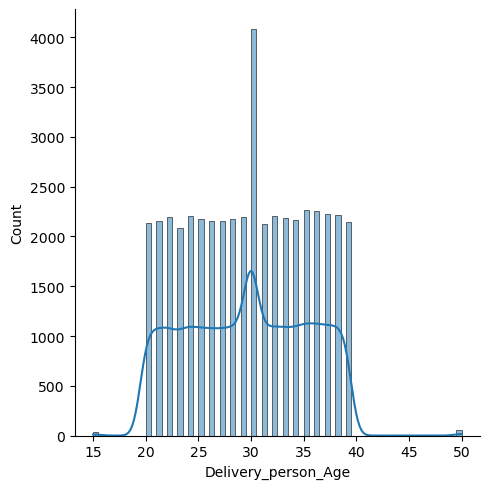

In [48]:
sns.displot(zomato['Delivery_person_Age'],kde= True) 
plt.show() 

**observation:** we can observe that maximum number of people working are of 30 years age

In [49]:
# created new column of age which is cut into different bins

zomato['age_bin'] = pd.cut(zomato['Delivery_person_Age'],bins = [18,26,33,40,50])

In [50]:
zomato.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_km,age_bin
0,36.0,4.2,evening,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.271464,"(33, 40]"
1,21.0,4.7,afternoon,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.229376,"(18, 26]"
2,23.0,4.7,afternoon,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.764306,"(18, 26]"
3,34.0,4.3,morning,Sandstorms,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,20,2.927795,"(33, 40]"
4,24.0,4.7,evening,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.373484,"(18, 26]"


In [51]:
zomato['age_bin'].value_counts()

age_bin
(26, 33]    17107
(18, 26]    15112
(33, 40]    13274
(40, 50]       53
Name: count, dtype: int64

### distance_km displot

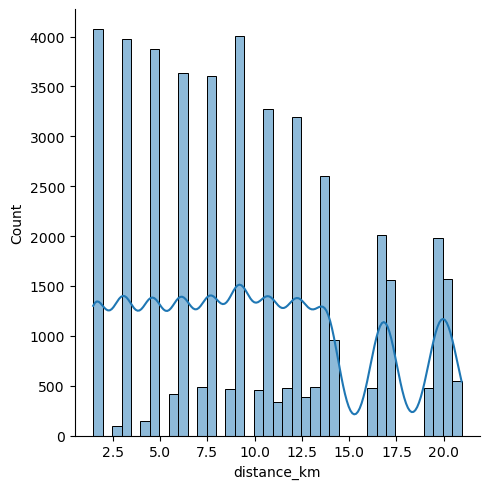

In [52]:
sns.displot(zomato['distance_km'],kde= True)
plt.show()

**Observation:** We can observe that distance is starting from 1 km and max is 20 km

In [53]:
zomato['distance_km'].min()

1.4638371061422368

In [54]:
zomato['distance_km'].max()

20.94290627698551

## Time_taken Displot

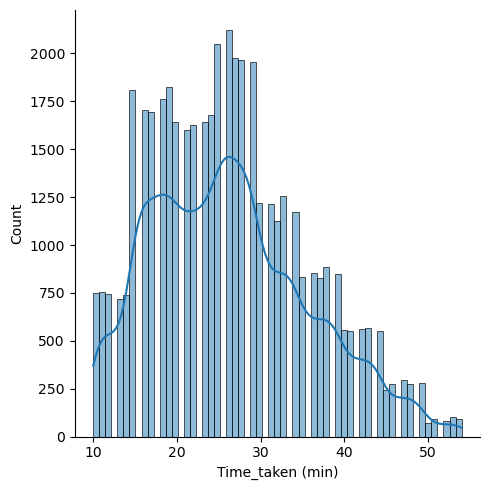

In [55]:
sns.displot(zomato['Time_taken (min)'],kde=True)
plt.show()

**observation** there are 2 peak visible, it means Time_taken is divided into 2 groups. 
<br> graph is right skewed, it means there are outliers in higher side of time taken

### Ratings

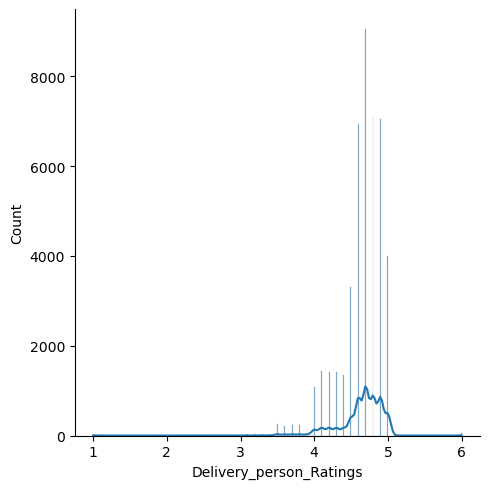

In [56]:
sns.displot(zomato['Delivery_person_Ratings'],kde= True)
plt.show()

**observation** Most of the values lie between 4 to 5

### **countplot**
A count plot visualizes the frequency of categories in a dataset using bars. I

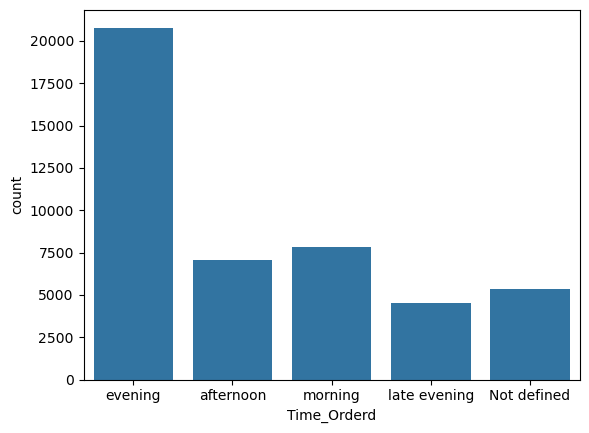

In [57]:
sns.countplot(x = 'Time_Orderd', data= zomato)
plt.show()

In [58]:
zomato.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_km,age_bin
0,36.0,4.2,evening,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.271464,"(33, 40]"
1,21.0,4.7,afternoon,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.229376,"(18, 26]"
2,23.0,4.7,afternoon,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.764306,"(18, 26]"
3,34.0,4.3,morning,Sandstorms,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,20,2.927795,"(33, 40]"
4,24.0,4.7,evening,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.373484,"(18, 26]"


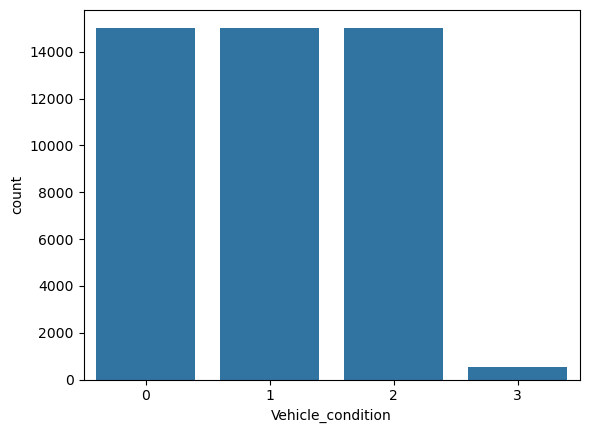

In [59]:
sns.countplot(x='Vehicle_condition',data= zomato)
plt.show()

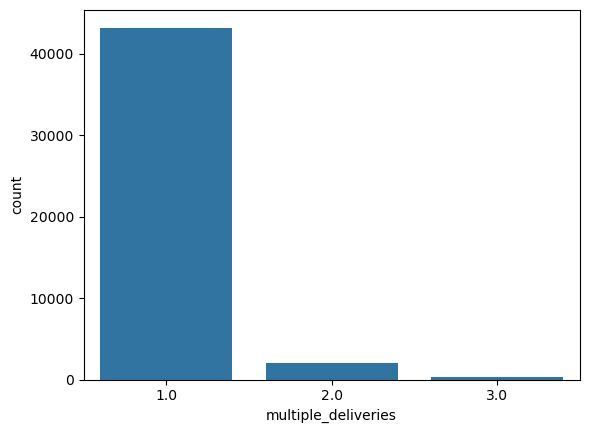

In [60]:
sns.countplot(x = 'multiple_deliveries', data = zomato)
plt.show()

### **Boxplot**
Box plot is create specifically for "Numerical variable" 

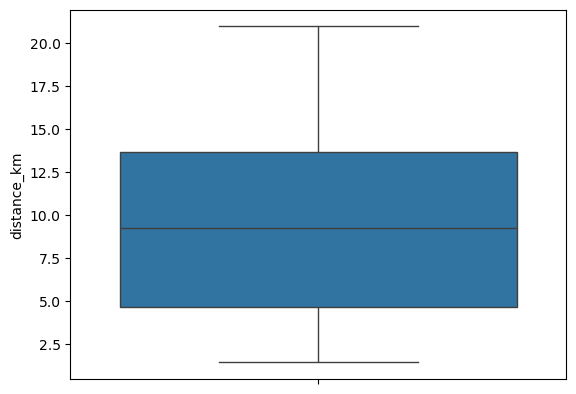

In [61]:
sns.boxplot(zomato['distance_km'])
plt.show()

**Observation** minimum value is around 2 Km, median is around 9 Km and max value is approx 21 Km

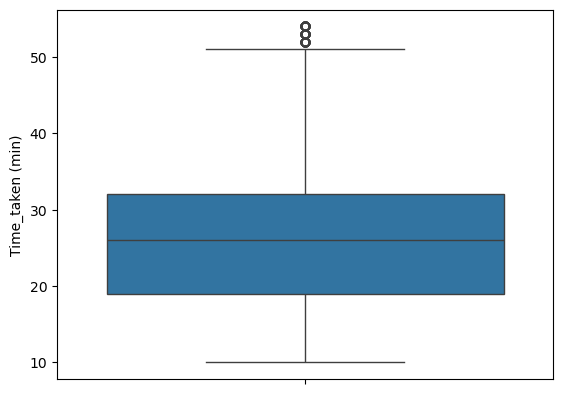

In [62]:
sns.boxplot(zomato['Time_taken (min)'])
plt.show()

**Observation** there are some outliers on the higher end side

### **BIVARIATE ANALYSIS**

In [63]:
zomato.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_km,age_bin
0,36.0,4.2,evening,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.271464,"(33, 40]"
1,21.0,4.7,afternoon,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.229376,"(18, 26]"
2,23.0,4.7,afternoon,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.764306,"(18, 26]"
3,34.0,4.3,morning,Sandstorms,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,20,2.927795,"(33, 40]"
4,24.0,4.7,evening,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.373484,"(18, 26]"


### **Scatterplot**
scatterplot is create specifically for "Two Numerical variable"

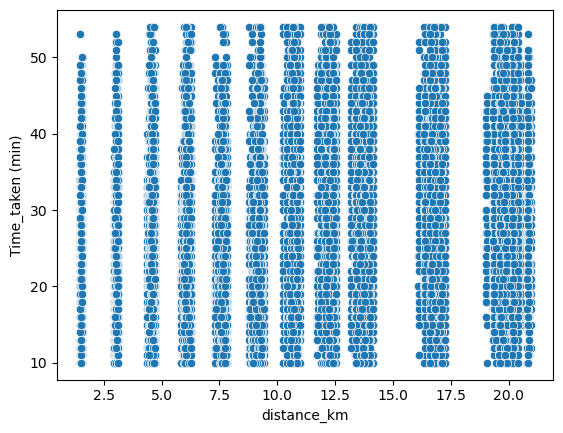

In [64]:
sns.scatterplot(x = 'distance_km', y = 'Time_taken (min)', data = zomato)
plt.show()

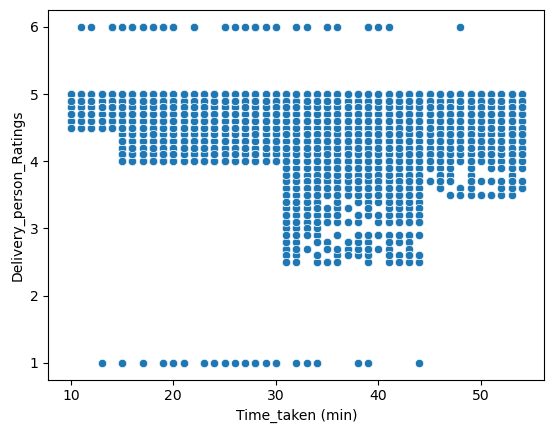

In [65]:
sns.scatterplot(y = 'Delivery_person_Ratings', x = 'Time_taken (min)', data = zomato)
plt.show()

**observation**: As time_taken is increasing, we can observe that ratings is decreasing (observe between 30 to 45 min)

 ### **Boxplot**

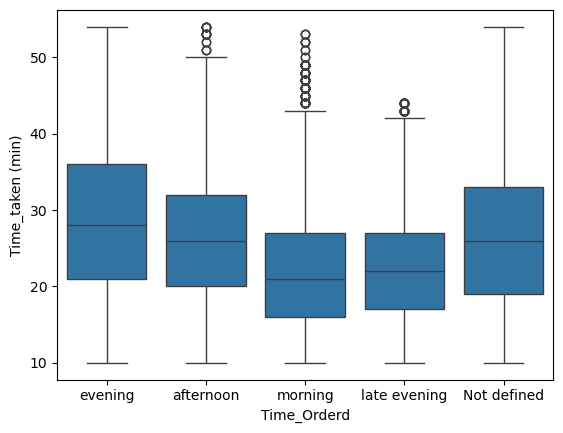

In [66]:
sns.boxplot(x = 'Time_Orderd', y = 'Time_taken (min)',data = zomato)
plt.show()

**observation** Highest median is of evening and in moring median is minimum as compare to other time categories

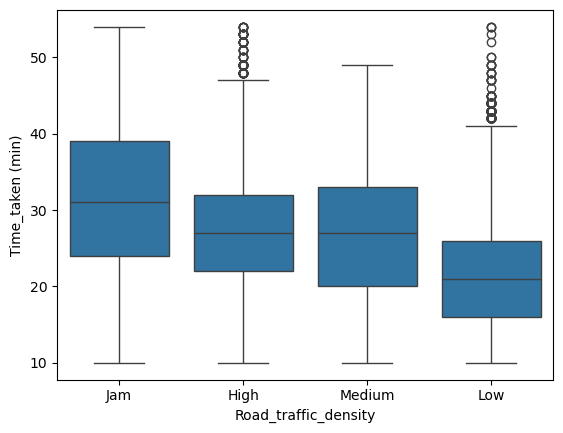

In [67]:
sns.boxplot(x = 'Road_traffic_density', y = 'Time_taken (min)',data = zomato)
plt.show()

**observation** Median of time taken is maximum for ```Jam```

### **Stripplot**
A strip plot is a simple data visualization used to display the distribution of individual data points along a single axis. It is especially useful for comparing numerical data across categories.

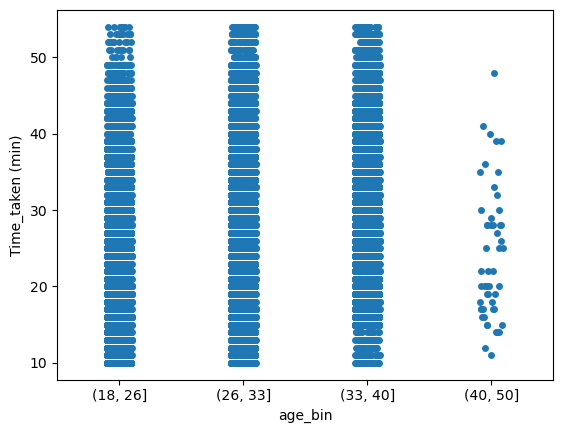

In [68]:
sns.stripplot(x= 'age_bin', y = 'Time_taken (min)',data = zomato)
plt.show()

### **Heatmap**
Heatmap in python visualize a matrix through color variation in a matrix format. They prove useful for spotting patterns in correlations matrices.
"Heatmap calculate only numerical variable".

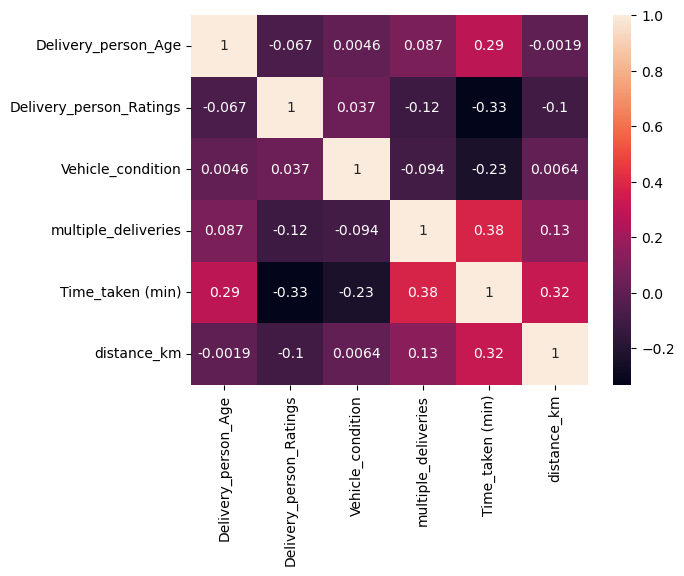

In [69]:
sns.heatmap(zomato.corr(numeric_only = True) ,annot=True)
plt.show()

**Observations**
<br> There is negative correlation between Time taken and ratings ```(-0.34)```
<br> There is negative correlation between Time taken and vehicle condition  ```(-0.24)```
<br> There is positive correlation between Time taken and multiple deliveries ```(0.38)```
<br> There is positive correlation between Time taken and distance ```(0.32)```
<br> There is negative correlation between Time taken and ratings ```(-0.34)```

### **MULTIVARIATE ANALYSIS**

In [70]:
zomato.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_km,age_bin
0,36.0,4.2,evening,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.271464,"(33, 40]"
1,21.0,4.7,afternoon,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.229376,"(18, 26]"
2,23.0,4.7,afternoon,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.764306,"(18, 26]"
3,34.0,4.3,morning,Sandstorms,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,20,2.927795,"(33, 40]"
4,24.0,4.7,evening,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.373484,"(18, 26]"


### **Scatterplot**

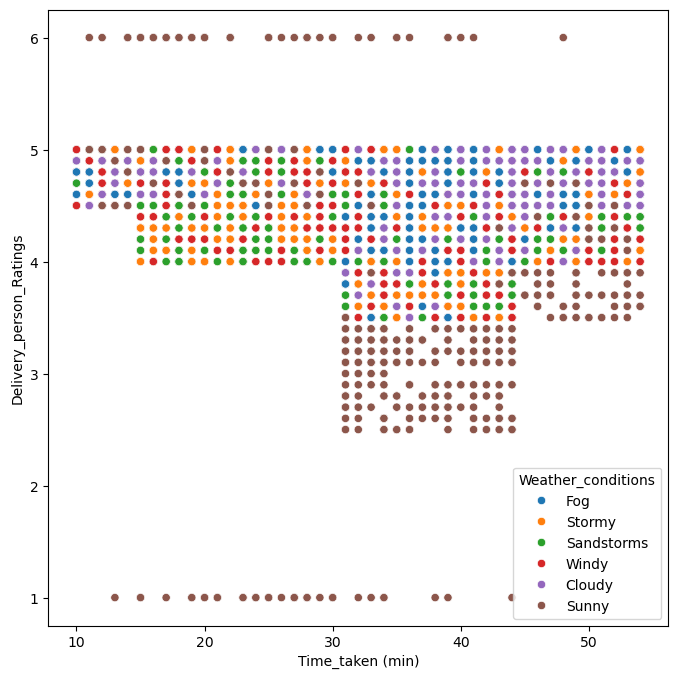

In [71]:
plt.figure(figsize= (8,8))
sns.scatterplot(y = 'Delivery_person_Ratings', x = 'Time_taken (min)', hue = 'Weather_conditions' ,data = zomato) ## Hue= Data visualization and ploting colors in graph
plt.show()

**Observation** we can observe, between 30 min to 45 Min delivery time, there is sudden drop in ratings. 
<br> All those instances have  **sunny** weather

### **Boxplot**

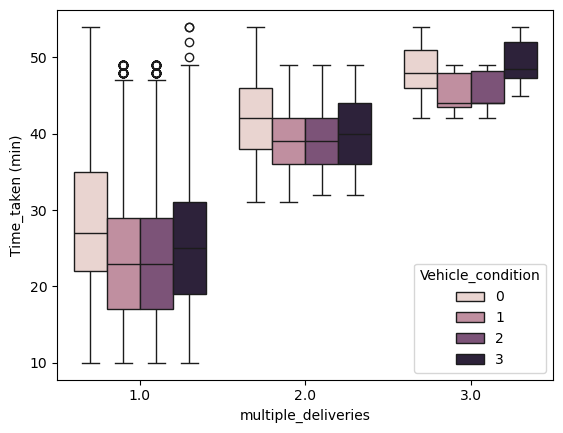

In [72]:
sns.boxplot(x = 'multiple_deliveries', y = 'Time_taken (min)',hue = 'Vehicle_condition',data = zomato)
plt.show()

**Observation** Multiple deliveries impact the time taken, 0 vehicle condition delivery time is higher

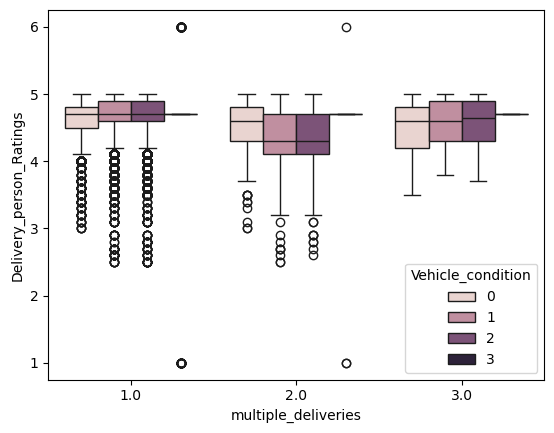

In [73]:
sns.boxplot(x = 'multiple_deliveries', y = 'Delivery_person_Ratings',hue = 'Vehicle_condition',data = zomato)
plt.show()

**Observation** Multiple deliveries impact the ratings

### **Lmplot**

lmplot is a visualization function in Seaborn used to show the relationship between two numerical variables along with a regression line. It helps understand trends, correlations, and patterns in data.

<Figure size 800x800 with 0 Axes>

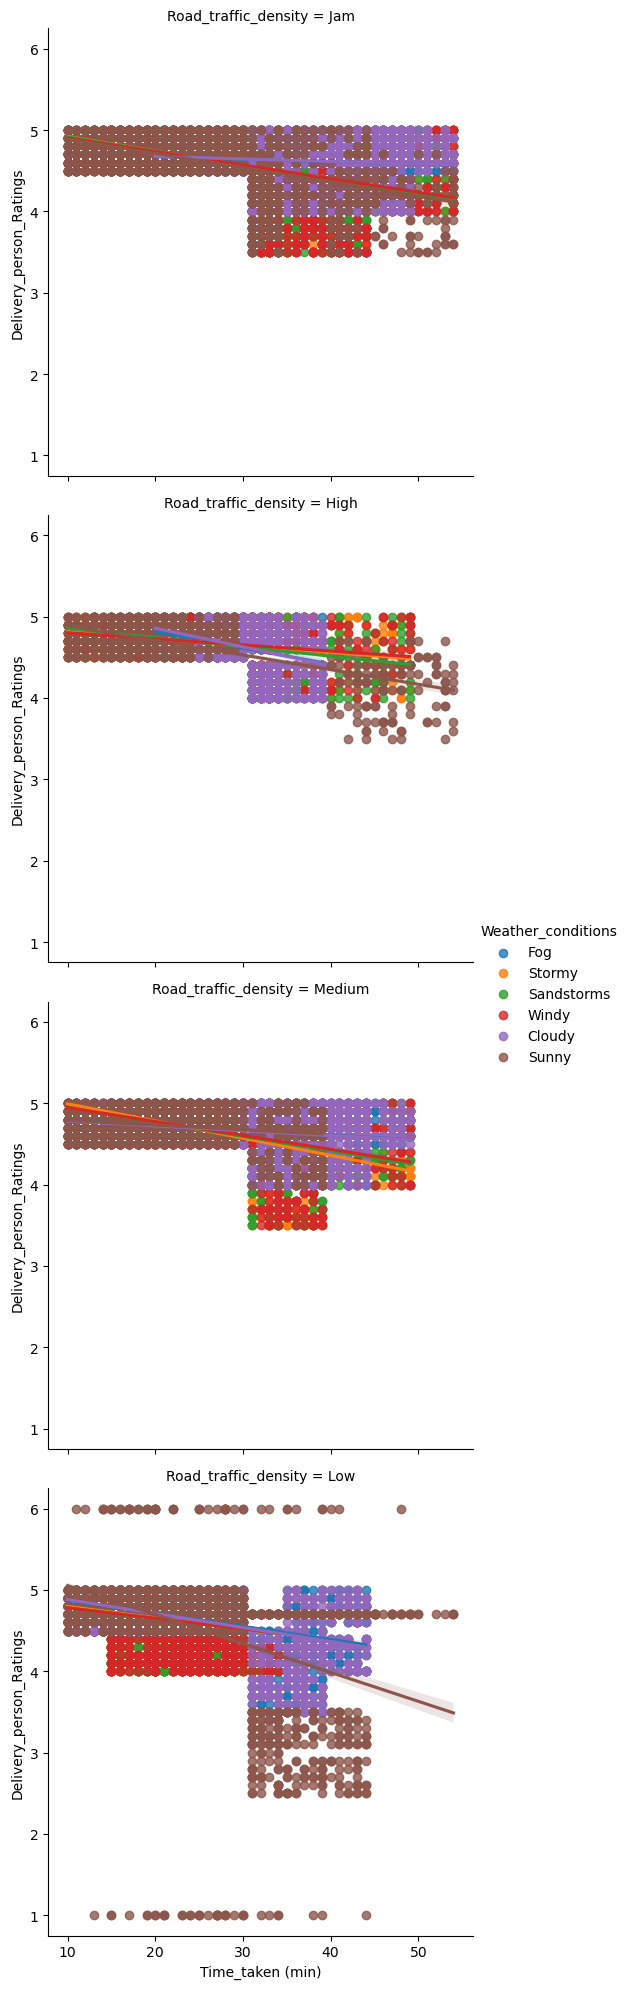

In [74]:
plt.figure(figsize= (8,8))
sns.lmplot(y = 'Delivery_person_Ratings', x = 'Time_taken (min)', hue = 'Weather_conditions' , row = 'Road_traffic_density',data = zomato)
plt.show()

**Observation** When road density is low, weather is sunny and  time taken is more than 30 min then customer has given the delivery agent below 3 ratings

<Figure size 800x800 with 0 Axes>

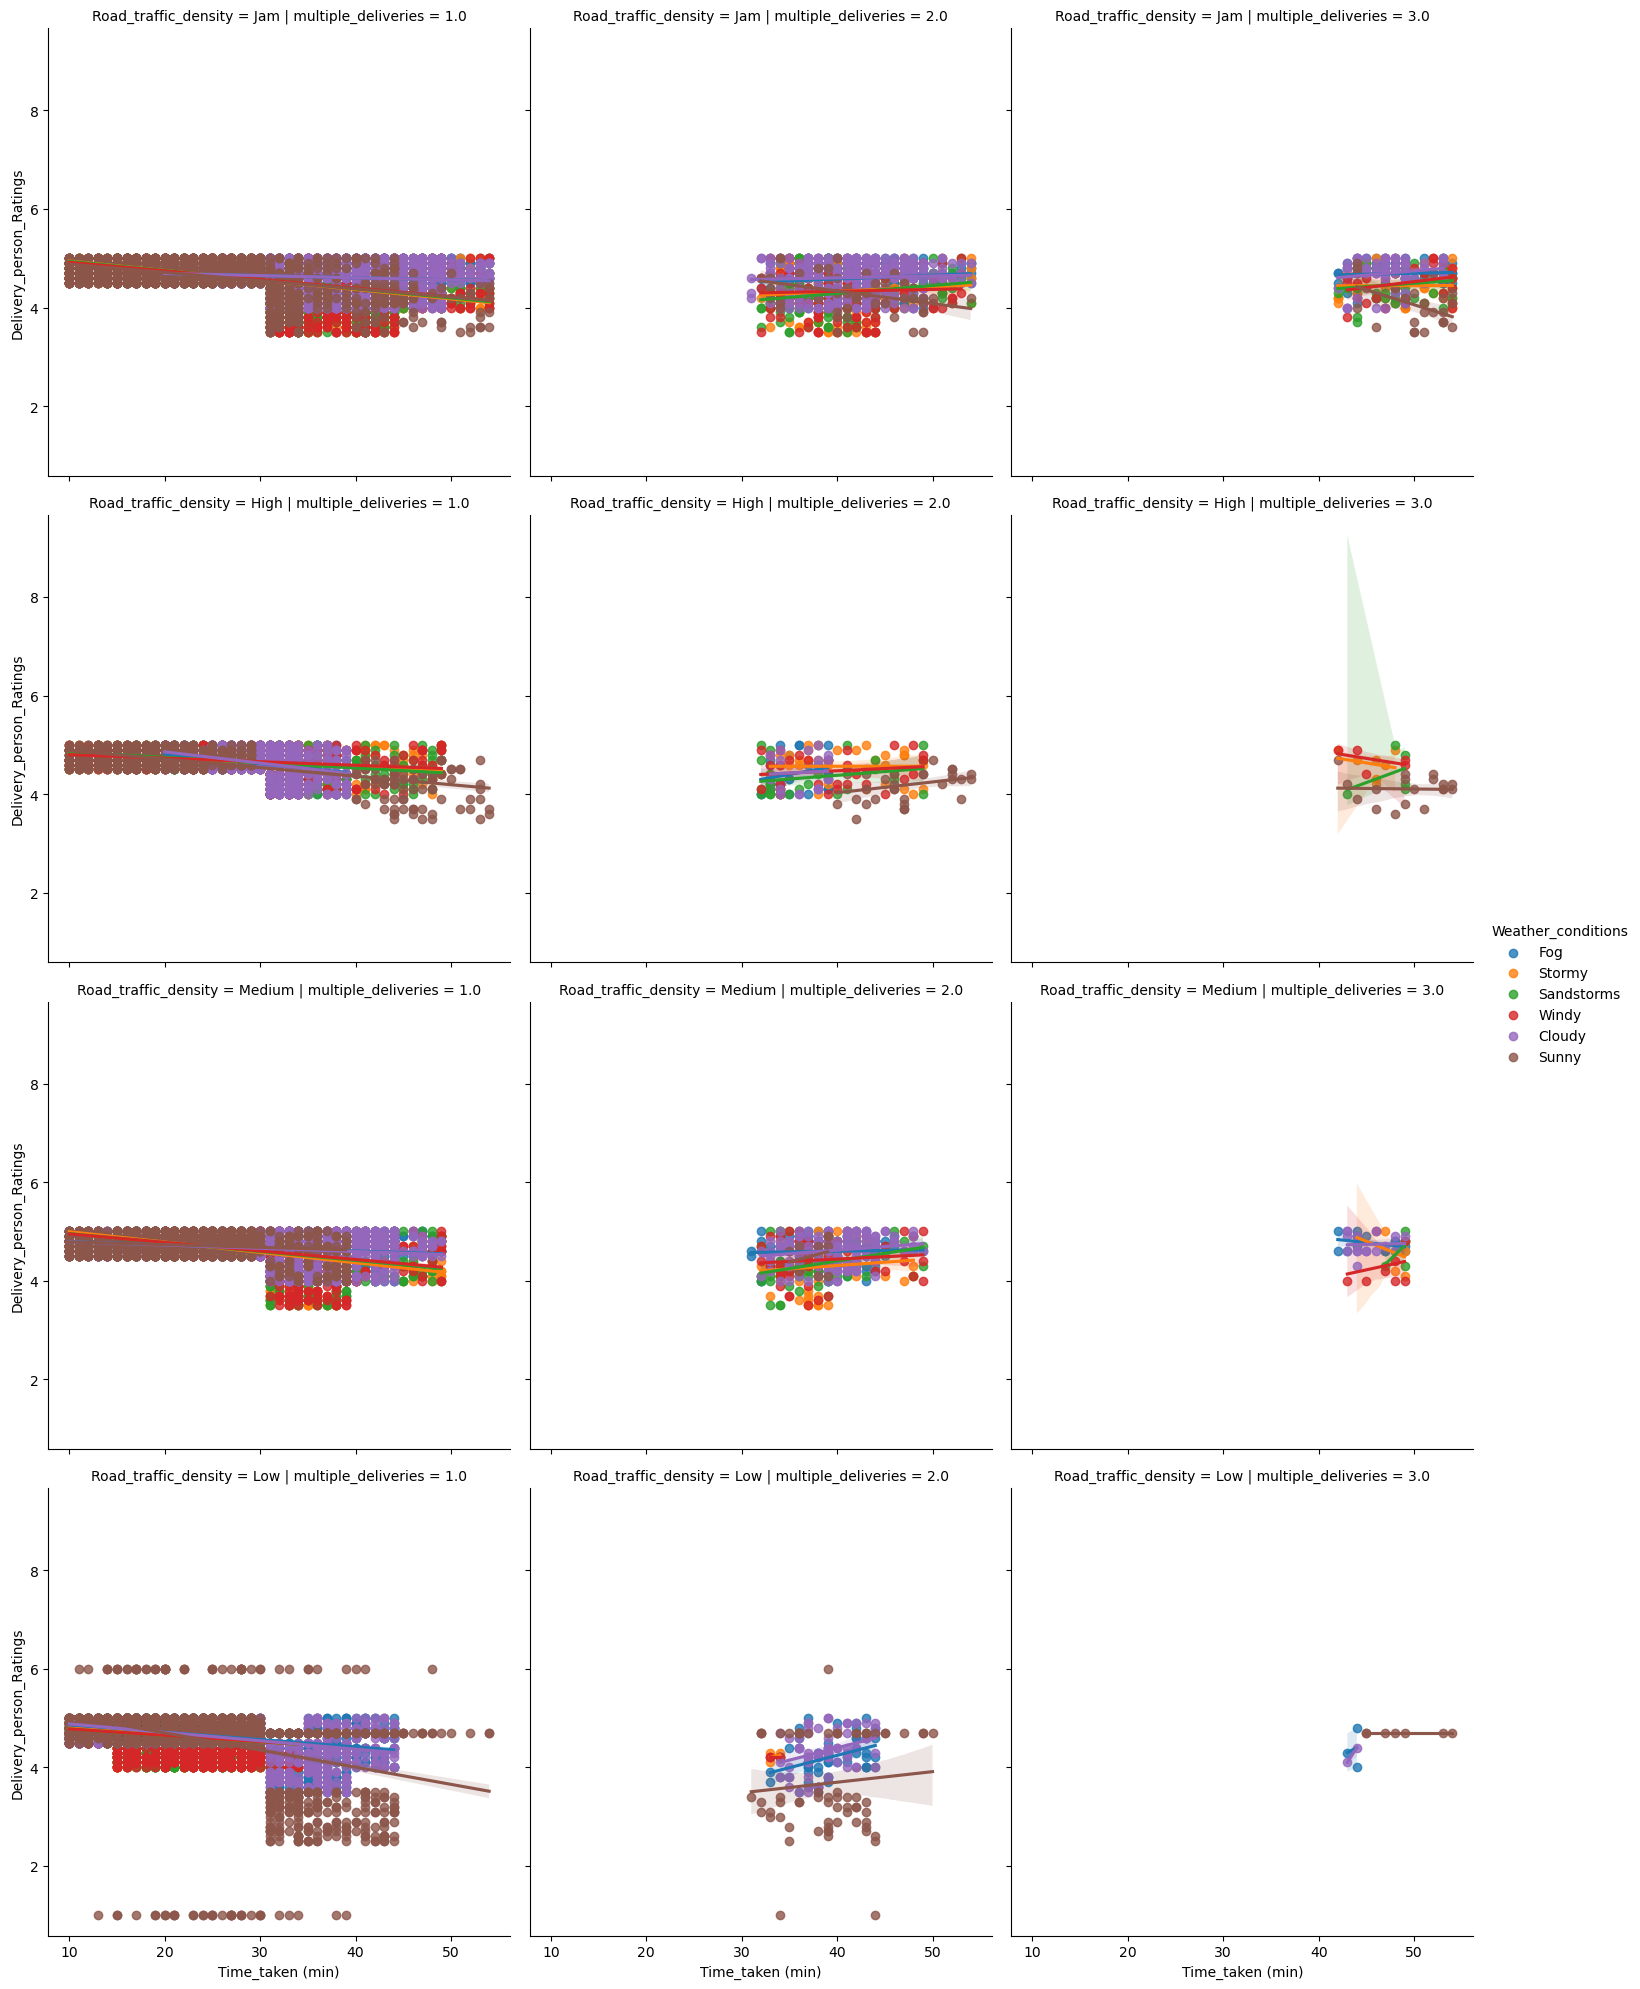

In [75]:
plt.figure(figsize= (8,8))
sns.lmplot(y = 'Delivery_person_Ratings', x = 'Time_taken (min)', hue = 'Weather_conditions' , row = 'Road_traffic_density', col= 'multiple_deliveries' , data = zomato)
plt.show()

**Observation** time taken with multiple delivery is high

### **Subplot**
A subplot is a way to display multiple plots in a single figure, arranged in rows and columns. It helps compare different visualizations side by side.

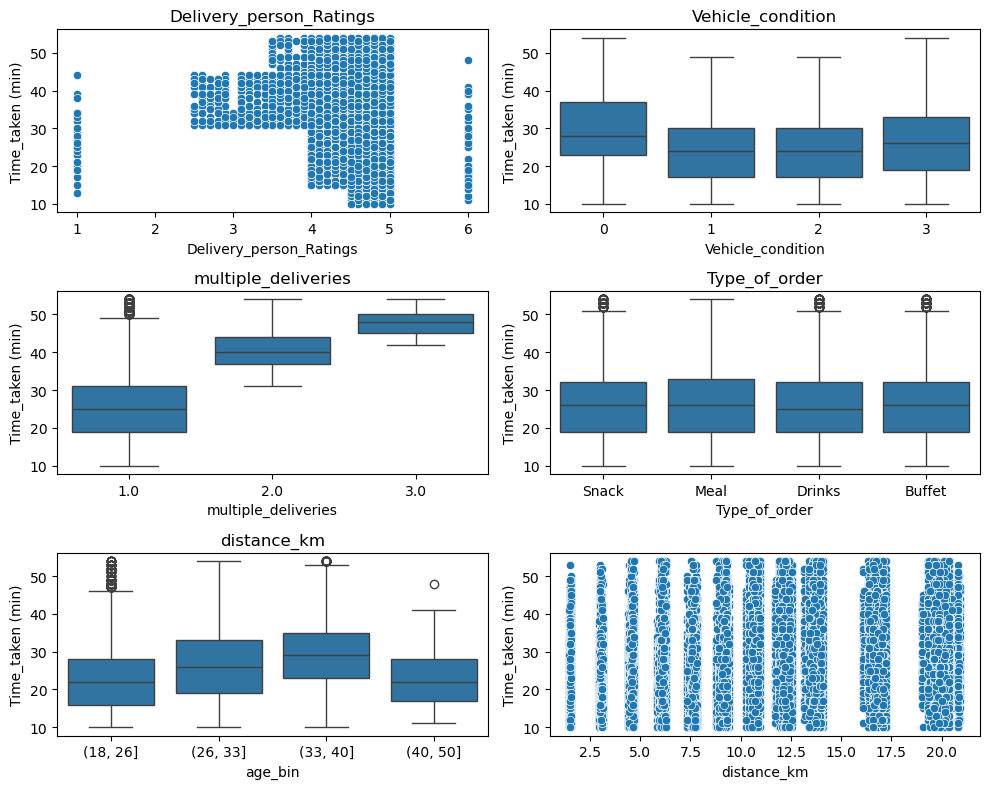

In [76]:
fig, axes = plt.subplots(3, 2, figsize=(10, 8)) 


sns.scatterplot(x= 'Delivery_person_Ratings', y= 'Time_taken (min)', data=zomato, ax=axes[0, 0])
sns.boxplot(x= 'Vehicle_condition', y= 'Time_taken (min)', data=zomato, ax=axes[0, 1])
sns.boxplot(x= 'multiple_deliveries', y= 'Time_taken (min)', data=zomato, ax=axes[1, 0])
sns.boxplot(x='Type_of_order', y='Time_taken (min)', data=zomato, ax=axes[1, 1])
sns.boxplot(x='age_bin', y='Time_taken (min)', data=zomato, ax=axes[2, 0])
sns.scatterplot(x = 'distance_km', y = 'Time_taken (min)', data = zomato, ax=axes[2, 1])




axes[0, 0].set_title('Delivery_person_Ratings')
axes[0, 1].set_title('Vehicle_condition')
axes[1, 0].set_title('multiple_deliveries')
axes[1, 1].set_title('Type_of_order')
axes[2, 0].set_title('age_bin')
axes[2, 0].set_title('distance_km')

plt.tight_layout()


plt.show()


**Observation** Multiple deliveries has highest correlation with time taken.
<br> ratings is affecting time taken
<br> age bins also affecting the time taken 

In [ ]:
zomato.head()

In [ ]:
# Using FacetGrid
g = sns.FacetGrid(zomato, col="Weather_conditions", row = "Time_Orderd",height= 3, aspect = 2)


g.map(sns.boxplot, x='Type_of_order', y='Time_taken (min)' ) 

plt.tight_layout()
plt.savefig('facetgrid.png')
plt.show()
